In [2]:
# import necessary libraries
import pandas as pd

In [3]:
#loading training data into pandas dataframe using csv file
imdb_reviews=pd.read_csv('Train.csv')

In [4]:
#exploring format of data in dataframe
imdb_reviews.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


As you can see the dataframe consists of two columns, text and label

The text column contains reviews and label column contains sentiment of the respective reviews


Also let us see how many class of values the label column contains

In [5]:
imdb_reviews['label'].value_counts()

0    20019
1    19981
Name: label, dtype: int64

We see that there are only two labels 0 and 1 and by going through data we can see that 0 refers to a negative review while 1 refers to a positive review

We can determine this analyzing any row randomly like done below

In [6]:
print('\n\nExample review:\n\n',imdb_reviews['text'].to_list()[5])

print('\n\nSentiment label:\n\n',imdb_reviews['label'].to_list()[5])

print('\n\nExample review:\n\n',imdb_reviews['text'].to_list()[6])

print('\n\nSentiment label:\n\n',imdb_reviews['label'].to_list()[6])



Example review:

 A terrible movie as everyone has said. What made me laugh was the cameo appearance by Scott McNealy, giving an award to one of the murdered programmers in front of a wall of SUN logos. McNealy is the CEO of SUN Microsystem, a company that practically defines itself by its hatred of Microsoft. They have been instrumental in filing antitrust complaints against Microsoft. So, were they silly enough to think this bad movie would add fuel to that fire?<br /><br />There's no public record I see of SUN's involvement, but clearly the makers of this movie know Scott McNealy. An interesting mystery.


Sentiment label:

 0


Example review:

 Finally watched this shocking movie last night, and what a disturbing mindf**ker it is, and unbelievably bloody and some unforgettable scenes, and a total assault on the senses. Looks like a movie from the minds of Lynch (specifically ERASERHEAD), Buttgereit, and even a little of "Begotten". What this guy does to his pregnant sister is be

#### Text Preprocessing

We can see a lot of problems with the text above. Example, it contains some html tags, which is no use to us. It also contains symbols which might not be significant to us, so we first process our data

In [7]:
#stopwords library from nltk package
from nltk.corpus import stopwords
#extracting english stopwords frm nltk package
stop_words = set(stopwords.words('english'))
#converting Set stopwords to list
stop_word_list=list(stop_words)
#function for preprocessing our reviews
def preprocess_text(corpus):
    # converting everything into lower case
    corpus['text']=corpus['text'].str.lower()
    #removing urls from the reviews using regular expressions(regex)
    corpus['text']=corpus['text'].str.replace(r"http\S+", "", regex=True)
    #removing everything except alphabets and numbers from reviews
    corpus['text']=corpus['text'].str.replace('[^A-Za-z0-9]+',' ', regex=True)
    #removing stopwords(frequently occuring words) like a, and, the , are which has no significance in our review analysis
    corpus['text']=corpus['text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_word_list))
    return corpus

In [8]:
#running the preprocessing function
reviews=preprocess_text(imdb_reviews)

In [9]:
reviews.head()

,text,label
0,grew b 1965 watching loving thunderbirds mates...,0
1,put movie dvd player sat coke chips expectatio...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movies bor...,0
4,im die hard dads army fan nothing ever change ...,1


Notice the changes in our text column now after preprocessing.

Now we are going to tokenize and lemmatize our data

#### Tokenization

Tokenization is the process of breaking down the sentence into words called tokens. These tokens help us in understanding the content and in the creation of our vocabulary. 

#### Lemmatization

Lemmatization helps in reducing the word to its common base root word. It takes the help of linguistic analysis of the words.

Eg. The base root word for <i>studies, stuying , studied</i> is <b>study</b>

In [10]:
#import nltk library
import nltk
#download wordnet and punkt package from nltk, it will be required for tokenization and lemmatization
nltk.download('wordnet')
nltk.download('punkt')
#intializing tokenizer object
w_tokenizer=nltk.tokenize.WhitespaceTokenizer()
#initializing lemmatizer object
lemmatizer=nltk.stem.WordNetLemmatizer()

#function for tokenizing and lemmatizing reviews
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
#applying the above function
reviews['lemmatized_tokens']=reviews['text'].apply(lemmatize_text)
#viewing the updated reviews dataframe
reviews.head()

[nltk_data] Downloading package wordnet to /home/abhi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/abhi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,label,lemmatized_tokens
0,grew b 1965 watching loving thunderbirds mates...,0,"[grew, b, 1965, watching, loving, thunderbird,..."
1,put movie dvd player sat coke chips expectatio...,0,"[put, movie, dvd, player, sat, coke, chip, exp..."
2,people know particular time past like feel nee...,0,"[people, know, particular, time, past, like, f..."
3,even though great interest biblical movies bor...,0,"[even, though, great, interest, biblical, movi..."
4,im die hard dads army fan nothing ever change ...,1,"[im, die, hard, dad, army, fan, nothing, ever,..."


Now we have somewhat processed review data

We can also perform some exploratory analysis tools to our reviews like analyzing frequent words in the review corpus and analyzing word combinations(bigrams) in the review corpus

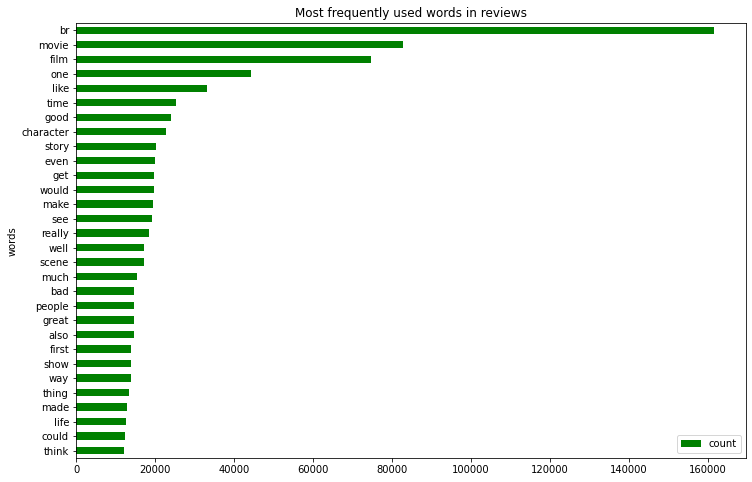

In [11]:
import itertools
import collections
import matplotlib.pyplot as plt

#Extracting tokenized and lemmatized reviews to a list
lemmatized_tokens=list(reviews['lemmatized_tokens'])
token_list=list(itertools.chain(*lemmatized_tokens))
count_no=collections.Counter(token_list)
clean_reviews=pd.DataFrame(count_no.most_common(30), columns=['words', 'count'])
fig, ax=plt.subplots(figsize=(12,8))
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="green")
ax.set_title("Most frequently used words in reviews")
plt.show()

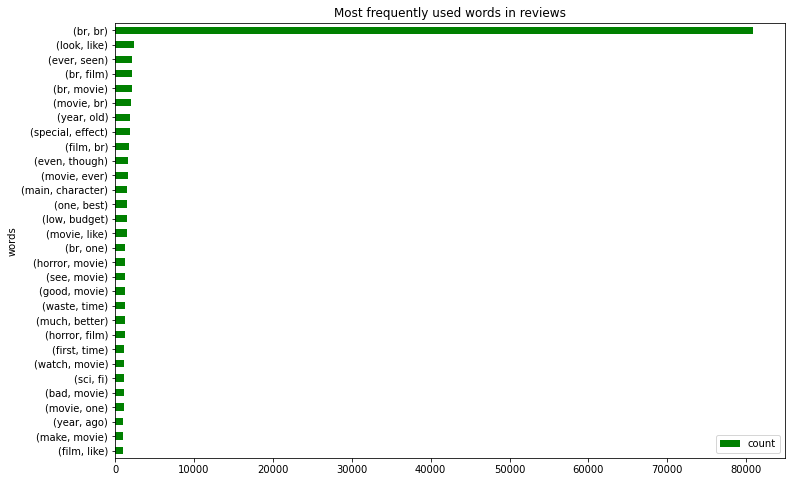

In [12]:
# Analyzing bigrams
bigrams=zip(token_list, token_list[1:])
count_no= collections. Counter(bigrams)

clean_reviews=pd.DataFrame(count_no.most_common(30), columns=['words', 'count'])
fig, ax=plt.subplots(figsize=(12,8))
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="green")
ax.set_title("Most frequently used words in reviews")
plt.show()

### Model Building

Here we will be using Ligh Gradient Boosting Machine (Light GBM) as our model. It is similar to XGBoost that uses tree based learning algorithms. 
- Achieves Faster Charging
- Low memory usage
- Better Accuracy
- Support for GPU computing
- Capable of handling lage data

We will also be using TFIDF Vectorizer for Word Embedding


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(max_features=2000)
#extracting features using tfidf in array format
features=tfidf_vectorizer.fit_transform(reviews['text']).toarray()

In [17]:
#import model library
import lightgbm as lgb
#import train test split module
from sklearn.model_selection import train_test_split
#import libraries for model metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#outputs
target=reviews['label']
#splitting training data to train and test
x_train, x_test, y_train, y_test=train_test_split(features, target, test_size=0.25)
#initializing model with hyperparameters, read documentation of the model for more details on hyperparameters
clf=lgb.LGBMClassifier(max_depth=20, n_estimators=25, min_child_weight=0.0016, n_jobs=-1)
#apply the training input and output for model to learn 
clf.fit(x_train, y_train)

LGBMClassifier(max_depth=20, min_child_weight=0.0016, n_estimators=25)

In [18]:
#run prediction on trained model with test data
pred=clf.predict(x_test)
print("Test data accuracy is: ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Test data accuracy is:  0.7946
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      5015
           1       0.78      0.82      0.80      4985

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000

